# MLFA A2 Q1: Logistic Regression

# ***` Logistic Regression `***

***` Import the Iris data which discusses about three species of flowers namely "Setosa","Verisicolor" and "Virginica" Your task is to build a logistic regression model to distinguish between two  of these speicies using features like "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width"`***

`1)Write a sigmoid function and visualize the sigmoid function,by considering x in the range of (-10,10).`

`2)Plot impact of logloss for single forecasts (You can import log_loss from sklearn.metrics). Make predictions as 0 to 1 in 0.01 increments. (For example,yhat = [x*0.01 for x in range(0, 101)]).Evaluate predictions for a 0 true value.Plot a graph between y_hat and log_loss`

`3)Find the difference between minimum log loss for label 0 and label 1 [1.5 marks]`

`3)Import the Iris Data, and visualize the data to an idea about it.`

`4)Convert the char labels to numerical as logistic regression takes only 0's and 1's and then create new array of numerical labels.After following the procedure as mentioned in the comments , find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1).[1 marks]`

`5)Split the data in X,y and convert them into arrays`

`6)Use sklearn to split the data (**Important** Consider random_state=42 and test_size=0.2)and perform Logistic Regression`

`7)Find the weights and bias and save it in a list[5 marks]`

`8)Make a prediction on the test data.Find the accuracy of the prediction.[1 marks]`

`9)Also predict the species of the flower whose sepal length=4.9cm	sepal width=4cm	petal length=1.2cm	petal width=0.4cm and return the Species of the data.[1.5 marks]`


In [ ]:
# Run this cell
# import important libraries library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics
import json
%matplotlib inline
ans = [None]*5

# ***`Importing and Visualizing Data`***



In [ ]:
#Sigmoid Function
def sigmoid(x):
    return 1/(1+np.exp(-x))

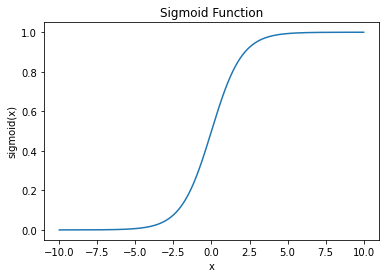

In [ ]:
#Visualize sigmoid function
#Create an array of x_val with values between -10 and 10 
#Find y_val, by using sigmoid function
#Plot x_val,y_val and label the graph
x_val = np.linspace(-10,10,1000)
y_val = sigmoid(x_val)
plt.plot(x_val,y_val)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.show()

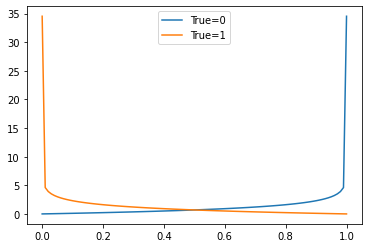

In [ ]:
# plot impact of logloss for single forecasts
# predictions as 0 to 1 in 0.01 increments
# evaluate predictions for a 0 true value
# evaluate predictions for a 1 true value
# plot input to loss
from sklearn.metrics import log_loss
yhat = [x/100 for x in range(0, 101)]
losses0 = [log_loss([0], [x], labels=[0, 1]) for x in yhat]
losses1 = [log_loss([1], [x], labels=[0, 1]) for x in yhat]
plt.plot(yhat, losses0, label='True=0')
plt.plot(yhat, losses1, label='True=1')
plt.legend()
plt.show()

In [ ]:
#Find the difference between minimum log loss for label 0 and label 1 
ans[0] = min(losses0)-min(losses1)

# ***`Processing the Data`***

In [ ]:
#Import the dataset of iris from datasets.load_iris()
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [ ]:
#Look into the top 5 rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


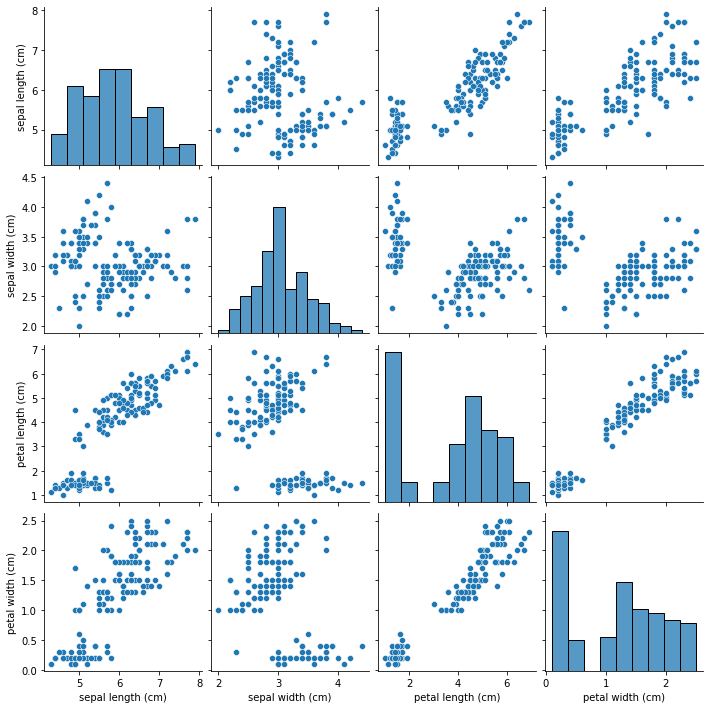

In [ ]:
#Visualize  the data using seaborn pairplot
sns.pairplot(df)

In [ ]:
# Convert char labels into numerical 
#import LabelEncoder which returns array of encoded labels
# Create new array of numerical labels
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
iris.target=labelencoder.fit_transform(iris.target)

In [ ]:
# Drop old labels(char) data 
# df.drop('target',axis=1,inplace=True)
# Substitute new labels(numerical) into data
df['target']=iris.target

In [ ]:
# Logistic regression only takes the data which has labels 0 and 1, so consider only data['labels']<2
# Considering Iris-setosa as "0" and Iris-versicolor as "1"
df=df[df['target']<2]

In [ ]:
#Find the difference between means of sepal length of speices "Setosa"(label 0) and "Versicolor"(label 1)
ans[1] = df[df['target']==0]['sepal length (cm)'].mean()-df[df['target']==1]['sepal length (cm)'].mean()

# ***`Obtaining Weight Values`***

In [ ]:
# Split the data into X and y
X = df.drop('target',axis=1)
y = df['target']

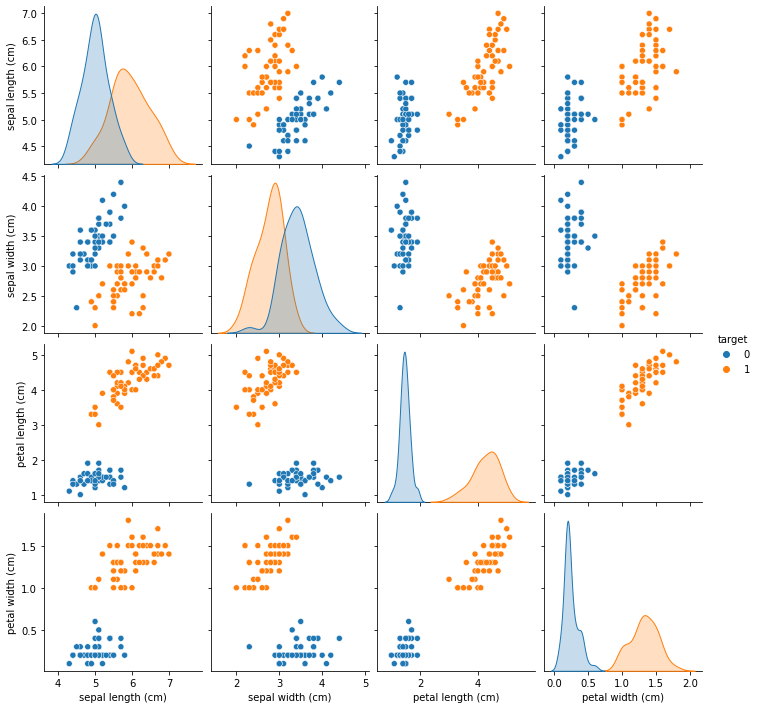

In [ ]:
# Visualize X,y
sns.pairplot(df,hue='target')

In [ ]:
# Convert X,y into arrays
X = np.array(X)
y = np.array(y)

In [ ]:
#Using sklearn to split the data
#Take the test size as 0.2 and random_state as 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Importing Necessary Libraries for Logistic Regression 
#Building our model
#Finding the parameter and bias
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
w1 = logmodel.coef_[0][0]
w2 = logmodel.coef_[0][1]
w3 = logmodel.coef_[0][2]
w4 = logmodel.coef_[0][3]
b = logmodel.intercept_[0]

In [ ]:
#Printing the parameters and bias
print(w1,w2,w3,w4,b)

0.45808171067944053 -0.8389565384015345 2.2168424707599437 0.9236259535228264 -6.5266650038990734


In [ ]:
#Save parameters and bias [w1,w2,w3,w4,b] as one vector 
#i.e if the answer should be in a 1 dimensional list
W = [w1,w2,w3,w4,b]
ans[2] = W

In [ ]:
#Predicitng on our test data
predictions = logmodel.predict(X_test)

In [ ]:
#Finding the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predictions)
print(accuracy)
ans[3] = accuracy

1.0


In [ ]:
#Predict for the input [4.9,4,1.2,0.4] , save the answer ans[4] "Setosa" or "Versicolor"
prediction = logmodel.predict([[4.9,4,1.2,0.4]])

In [ ]:
#The class of the input 
ans[4]  = "Setosa" if prediction[0]==0 else "Versicolor"
print(ans[4])

Setosa


In [ ]:
# Run the this cell to submit your answers and get score evaluated"
# Do not make any changes in this cell
# Simply execute it and move on

ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
! ~/submit

/bin/bash: /root/submit: No such file or directory
